# Ojei Victory Chioma

## Student Number: 202137995

# Data Processing

#### 1

In [18]:
import csv

# Read the CSV file and print the first few rows
with open('acw_user_data.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    # Display the first few rows to verify
    for i, row in enumerate(csv_reader):
        print(row)
        if i >= 20:  # Print only the first 20 rows for easy readability
            break

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)', 'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
['Studio 33K Joel walk', 'Randallborough', 'ME3N

#### 2

In [19]:
import json

# Function to convert a flat dictionary row into a nested structure
def convert_to_nested(row):
    # Nested structures
    vehicle = {
        'make': row['Vehicle Make'],
        'model': row['Vehicle Model'],
        'year': int(row['Vehicle Year']),
        'type': row['Vehicle Type']
    }
    credit_card = {
        'start_date': row['Credit Card Start Date'],
        'expiry_date': row['Credit Card Expiry Date'],
        'number': row['Credit Card Number'],
        'cvv': row['Credit Card CVV'],
        'iban': row['Bank IBAN']
    }
    address = {
        'street': row['Address Street'],
        'city': row['Address City'],
        'postcode': row['Address Postcode']
    }

    # Construct the final dictionary for each person
    person = {
        'first_name': row['First Name'],
        'last_name': row['Last Name'],
        'age': int(row['Age (Years)']),
        'dependants': row['Dependants'] if row['Dependants'].strip() else None,
        'marital_status': row['Marital Status'],
        'retired': row['Retired'] == 'True',  # Converting to boolean
        'salary': float(row['Yearly Salary (Dollar)']) if row['Yearly Salary (Dollar)'] else None,
        'pension': float(row['Yearly Pension (Dollar)']) if row['Yearly Pension (Dollar)'] else None,
        'sex': row['Sex'],
        'commute_distance': float(row['Distance Commuted to Work (Km)']),
        'employer': row['Employer Company'],
        'vehicle': vehicle,
        'credit_card': credit_card,
        'address': address
    }
    
    return person

# Read the CSV file and apply the nested conversion
data = []
with open('acw_user_data.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        nested_row = convert_to_nested(row)
        data.append(nested_row)


#### 3

In [20]:
# List to store problematic row indices
problematic_rows = []

# Read the CSV file and check for issues in the 'Dependants' column
with open('acw_user_data.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    data = []
    
    for i, row in enumerate(csv_reader):
        # Check if 'Dependants' is empty or only contains spaces
        if row['Dependants'].strip() == "":
            row['Dependants'] = "0"  # Replace empty entries with "0"
            problematic_rows.append(i + 1) 
        # Append the row (converted as needed) to the data list
        data.append(row)

# Output the list of problematic rows
print("Problematic rows for dependants:", problematic_rows)

Problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


#### 4

In [21]:
# Write the processed data to a JSON file
with open('processed.json', mode='w') as json_file:
    json.dump(data, json_file, indent=4)

print("Data processing complete. Nested structure has been saved to 'processed.json'.")

Data processing complete. Nested structure has been saved to 'processed.json'.


#### 5

In [22]:
# Lists to filter data for Retired Customers and Employed Customers
employed_customers = [person for person in data if person['Employer Company'] != 'N/A']
retired_customers = [person for person in data if person['Retired'] == True]

# Write retired customers and employed customers to retired.json
with open('retired.json', mode='w') as retired_file:
    json.dump(retired_customers, retired_file, indent=4)

with open('employed.json', mode='w') as employed_file:
    json.dump(employed_customers, employed_file, indent=4)

print("Files 'retired.json' and 'employed.json' have been created.")

Files 'retired.json' and 'employed.json' have been created.


#### 6

In [23]:
from datetime import datetime

# Function to determine if a credit card should be flagged for exceeding 10 years
def should_flag_credit_card(row):
    # Parse the credit card start and expiry dates in "MM/YY" format
    start_date = datetime.strptime(row['Credit Card Start Date'], "%m/%y")
    end_date = datetime.strptime(row['Credit Card Expiry Date'], "%m/%y")
    
    # Calculate the difference in years between the start and end date
    duration_years = (end_date.year - start_date.year) + ((end_date.month - start_date.month) / 12.0)
    
    # Flag if the difference is greater than 10 years
    return duration_years > 10

# Use the function to filter out flagged customers
flagged_customers = [person for person in data if should_flag_credit_card(person)]

# Write the flagged customers to remove_ccard.json
with open('remove_ccard.json', mode='w') as file:
    json.dump(flagged_customers, file, indent=4)

print("Flagged credit card entries have been saved to 'remove_ccard.json'.")

Flagged credit card entries have been saved to 'remove_ccard.json'.


#### 7

In [24]:
# Load the processed data from the processed.json file
with open('processed.json', mode='r') as file:
    data = json.load(file)

# Function to calculate the "Salary-Commute" metric
def calculate_salary_commute(person):
    try:
        commute_distance = float(person['Distance Commuted to Work (Km)'])
    except (ValueError, TypeError):
        commute_distance = 0.0  # Default to 0 if conversion fails
    try:
        salary = float(person['Yearly Salary (Dollar)']) if person['Yearly Salary (Dollar)'] else 0.0
    except (ValueError, TypeError):
        salary = 0.0

    # If commute distance is 1 km or less, return the salary directly
    if commute_distance <= 1:
        return salary
    else:
        # Calculate salary per km of commute
        return salary / commute_distance

# Add the "Salary-Commute" metric to each customer's data
for person in data:
    person['salary_commute'] = calculate_salary_commute(person)

# Sort the data by the "Salary-Commute" metric in ascending order
sorted_data = sorted(data, key=lambda x: x['salary_commute'])

# Write the sorted data to a JSON file
with open('commute.json', mode='w') as output_file:
    json.dump(sorted_data, output_file, indent=4)

print("Sorted data with Salary-Commute metric saved to 'commute.json'.")

Sorted data with Salary-Commute metric saved to 'commute.json'.


# Data Visualisation

#### 1

In [11]:
import pandas as pd

# Load the original CSV file using Pandas
df = pd.read_csv('acw_user_data.csv')

# Convert relevant columns to numeric data types for analysis
df['Yearly Salary (Dollar)'] = pd.to_numeric(df['Yearly Salary (Dollar)'], errors='coerce')
df['Age (Years)'] = pd.to_numeric(df['Age (Years)'], errors='coerce')

# Calculate the mean salary and median age
mean_salary = df['Yearly Salary (Dollar)'].mean()
median_age = df['Age (Years)'].median()

print("Mean Salary:", mean_salary)
print("Median Age:", median_age)

Mean Salary: 57814.078
Median Age: 54.0


#### 2

Matplotlib is building the font cache; this may take a moment.
C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


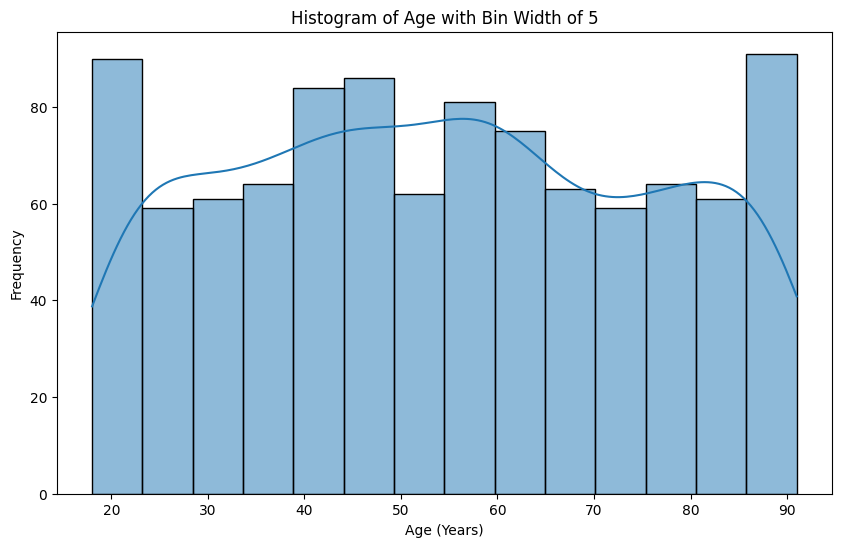

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of bins needed for a bin width of 5
age_min = df['Age (Years)'].min()
age_max = df['Age (Years)'].max()
bin_width = 5
num_bins = int((age_max - age_min) / bin_width)

# Plot the histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age (Years)'], bins=num_bins, kde=True)
plt.title('Histogram of Age with Bin Width of 5')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


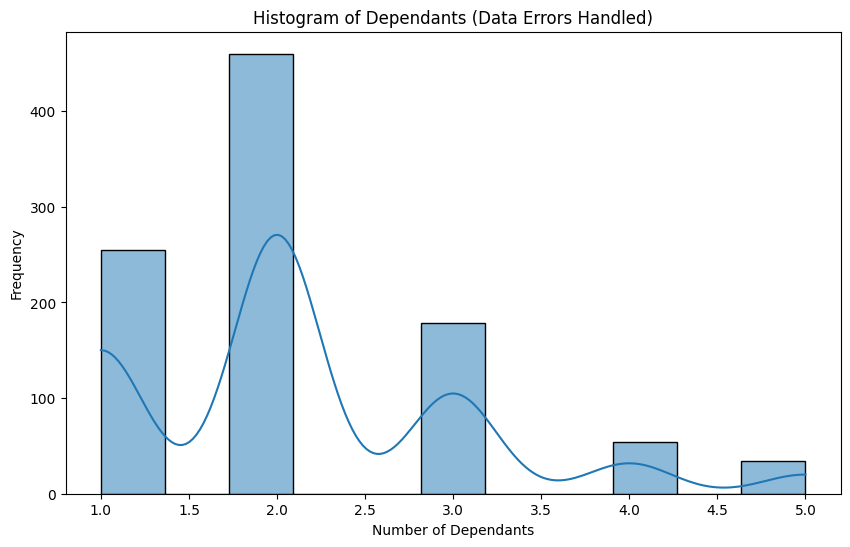

In [13]:
# Convert Dependants column to numeric type, handling errors
df['Dependants'] = pd.to_numeric(df['Dependants'], errors='coerce')

# Plot the histogram for Dependants
plt.figure(figsize=(10, 6))
sns.histplot(df['Dependants'].dropna(), kde=True)
plt.title('Histogram of Dependants (Data Errors Handled)')
plt.xlabel('Number of Dependants')
plt.ylabel('Frequency')
plt.show()

C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping wi

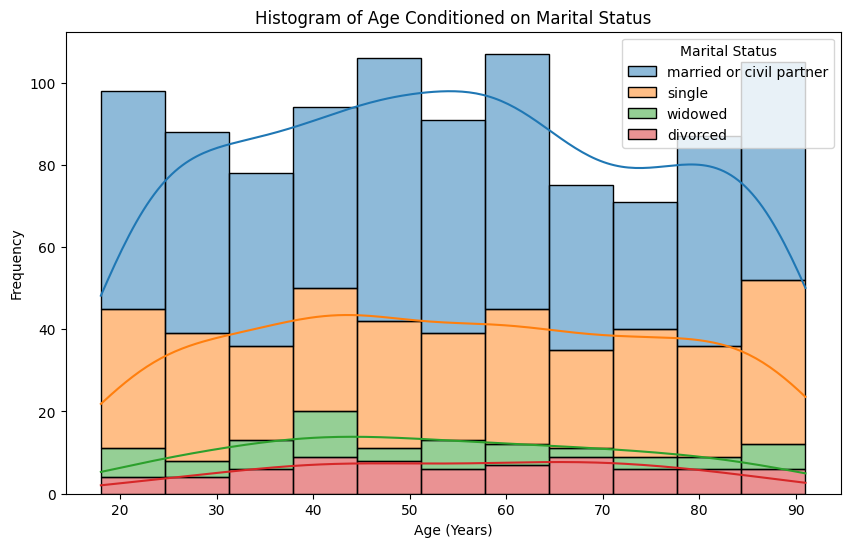

In [14]:
# Plot the histogram for Age conditioned on Marital Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age (Years)', hue='Marital Status', multiple='stack', kde=True)
plt.title('Histogram of Age Conditioned on Marital Status')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

#### 3

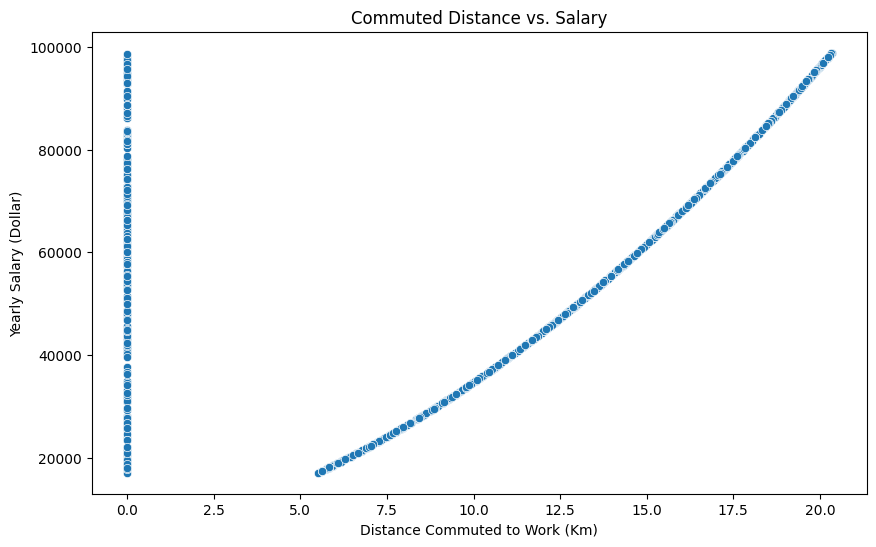

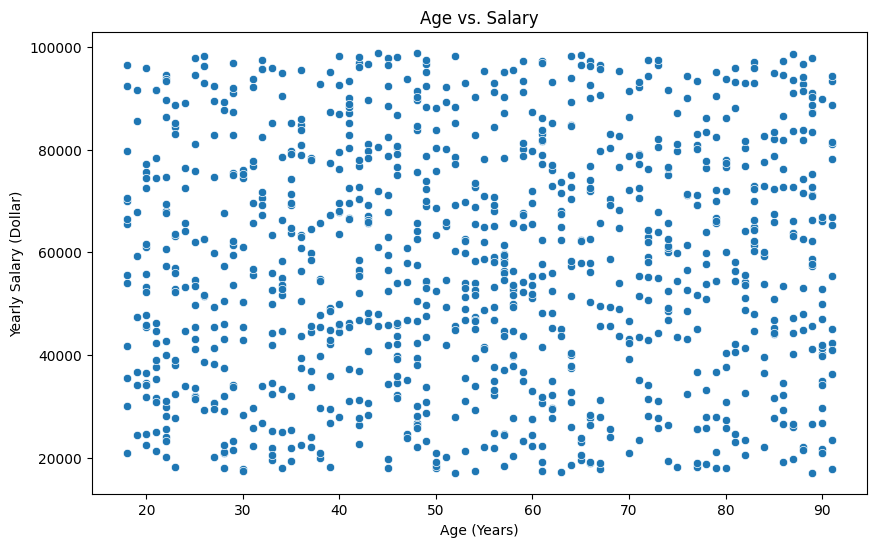

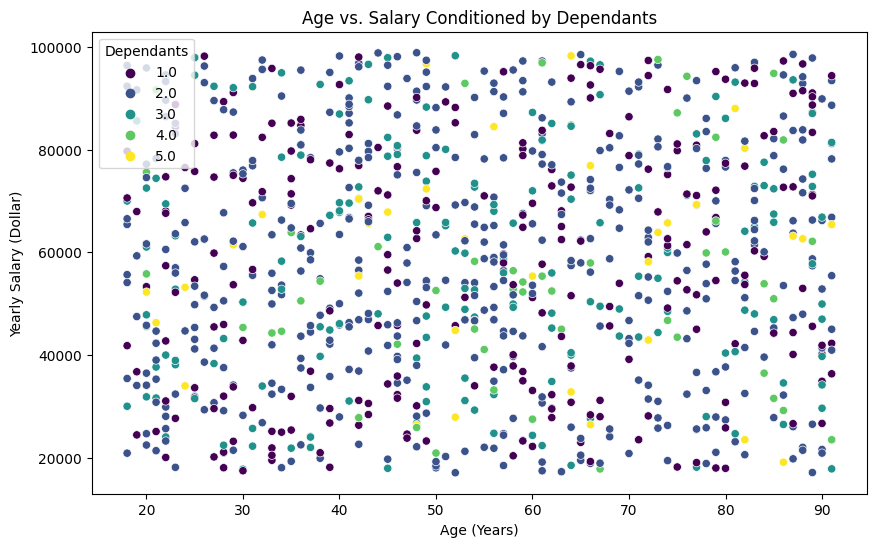

In [15]:
df['Distance Commuted to Work (Km)'] = pd.to_numeric(df['Distance Commuted to Work (Km)'], errors='coerce')

# 3a. Commuted Distance vs. Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance Commuted to Work (Km)', y='Yearly Salary (Dollar)')
plt.title('Commuted Distance vs. Salary')
plt.xlabel('Distance Commuted to Work (Km)')
plt.ylabel('Yearly Salary (Dollar)')
plt.show()

# 3b. Age vs. Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (Dollar)')
plt.title('Age vs. Salary')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Salary (Dollar)')
plt.show()

# 3c. Age vs. Salary Conditioned by Dependants
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (Dollar)', hue='Dependants', palette='viridis')
plt.title('Age vs. Salary Conditioned by Dependants')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Salary (Dollar)')
plt.legend(title='Dependants')
plt.show()

#### 4

In [16]:
# Save the generated plots as image files
# 2a. Plot the histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age (Years)'], bins=num_bins, kde=True)
plt.title('Histogram of Age with Bin Width of 5')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.savefig('Histogram of Age with Bin Width of 5.png')
plt.close()

# 2b. Plot the histogram for Dependants
plt.figure(figsize=(10, 6))
sns.histplot(df['Dependants'].dropna(), kde=True)
plt.title('Histogram of Dependants (Data Errors Handled)')
plt.xlabel('Number of Dependants')
plt.ylabel('Frequency')
plt.savefig('Histogram of Dependants (Data Errors Handled).png')
plt.close()

# 2c. Plot the histogram for Age conditioned on Marital Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age (Years)', hue='Marital Status', multiple='stack', kde=True)
plt.title('Histogram of Age Conditioned on Marital Status')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.savefig('Histogram of Age Conditioned on Marital Status.png')
plt.close()

# 3a. Commuted Distance vs. Salary Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance Commuted to Work (Km)', y='Yearly Salary (Dollar)')
plt.title('Commuted Distance vs. Salary')
plt.xlabel('Distance Commuted to Work (Km)')
plt.ylabel('Yearly Salary (Dollar)')
plt.savefig('commuted_distance_vs_salary.png')
plt.close()

# 3b. Age vs. Salary Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (Dollar)')
plt.title('Age vs. Salary')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Salary (Dollar)')
plt.savefig('age_vs_salary.png')
plt.close()

# 3c. Age vs. Salary Conditioned by Dependants Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (Dollar)', hue='Dependants', palette='viridis')
plt.title('Age vs. Salary Conditioned by Dependants')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Salary (Dollar)')
plt.legend(title='Dependants')
plt.savefig('age_vs_salary_by_dependants.png')
plt.close()

C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future versi